In [1]:
# System Level
import os
from os import listdir,mkdir,rmdir
from os.path import join,isdir,isfile
import sys

# File I/O
import pydicom
import imageio
import itk

# Math
import numpy as np

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset,DataLoader
from torchvision import transforms,utils
from torchvision.transforms import functional as func

# Adding Custom Built Libraries
sys.path.append('..')

# Visualization
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display

In [2]:
plt.rcParams['figure.figsize'] = [16,9]

In [3]:
# Defining a Network: GoogLe Net
# Theory of a nn.Module: init + foward
from nets.architectures import GoogLeNet

In [4]:
# Create a wrapper that can:
# - run a training iteration
# - run a validation iteration
# - save/load a model
# - create optimizer
from nets.wrapper import nnet_2d
my_nnet = nnet_2d(in_chan=1, class_num=2, gpu=False)

In [5]:
# Creating a data loader:
# - creation of a dataset object
# - parallel process reading data
from utils.data_loaders import *
bs = 128
data_va = example_data_front(path_data='/home/darvin/ml-bucket/bacon',
                             transform=transforms.Compose([
                                 Resize(),
                                 ToTensor()
                             ]))
loader_va = DataLoader(data_va, batch_size=bs, shuffle=False, num_workers=12)
data_tr = example_data_back(path_data='/home/darvin/ml-bucket/bacon',
                            transform=transforms.Compose([
                                Resize(),
                                RandomRotate(),
                                RandomFlip(),
                                ToTensor()
                            ]))
loader_tr = DataLoader(data_tr, batch_size=bs, shuffle=True, num_workers=12)

KeyboardInterrupt: 

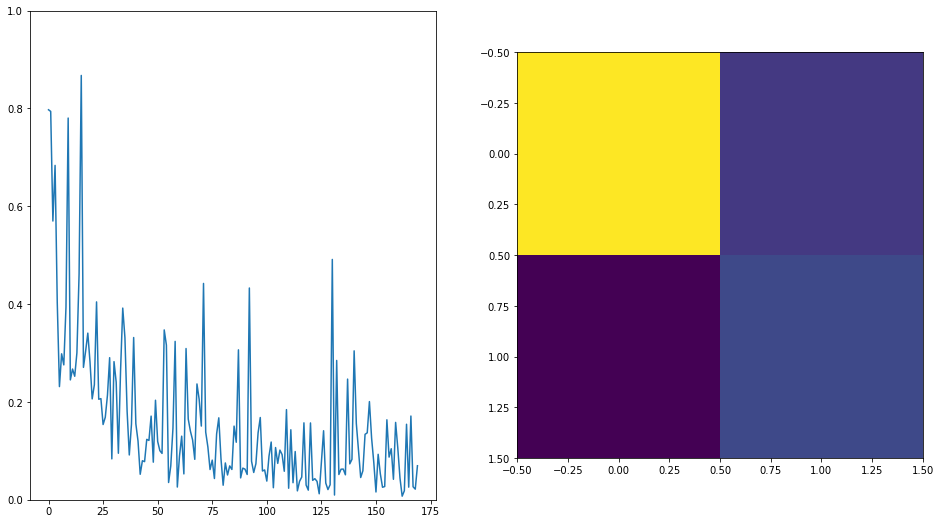

In [6]:
# Running a traning loop:
ep = 100

fig,ax = plt.subplots(1,2)
losses = []

for ii in range(ep):
    for sample in loader_tr:
        X,Y = sample['X'],sample['Y'].view(-1)
        #my_nnet.train_one_iter(X.cuda(), Y.cuda())
        losses.append(my_nnet.train_one_iter(X, Y).detach().cpu().numpy())
    conf = np.zeros((2,2))
    for sample in loader_va:
        X,Y = sample['X'],sample['Y'].view(-1)
        pred = np.argmax(my_nnet.make_prediction(X).detach().cpu().numpy(), axis=1)
        gt   = Y.detach().cpu().numpy()
        for jj in range(pred.shape[0]):
            conf[pred[jj],gt[jj]] += 1
    ax[0].cla()
    ax[0].plot(losses)
    ax[0].set_ylim([0,1.0])
    ax[1].cla()
    ax[1].imshow(conf)
    display.display(plt.gcf())
    display.clear_output(wait=True)

In [ ]:
'''
SANDBOX_REGION
'''
from os import listdir
from os.path import join
import numpy as np
import pydicom
import itk
%matplotlib inline
import matplotlib.pyplot as plt

def normalize_img(img):
    img = img.astype(np.float32)
    img -= np.min(img)
    img /= (np.max(img) + 1e-6)
    return img
# Reading in the .dcm file pixel data
path_dcms = '/home/darvin/ml-bucket/bacon'
print(len(listdir(path_dcms)))
name_dcm  = np.random.choice(listdir(path_dcms))
path_dcm  = join(path_dcms, name_dcm)
dcm       = pydicom.dcmread(path_dcm)
#img       = np.zeros((256,256))
#img       = dcm.PixelData
#print(img)

PixelType = itk.ctype('signed short')
Dimension = 2
ImageType = itk.Image[PixelType, Dimension]
reader = itk.ImageSeriesReader[ImageType].New()
dicomIO = itk.GDCMImageIO.New()
reader.SetImageIO(dicomIO)
reader.SetFileNames([path_dcm])
reader.Update()
reader.GetOutput()
img = itk.GetArrayFromImage(reader.GetOutput())

#img       = dcm.pixel_array
img       = normalize_img(img)
# Reading in the .dcm file metadata for class labels
label_str = dcm.PatientSex
label     = (label_str == 'M')

plt.imshow(img)
plt.title(str(label_str) + ' ' + str(label))

In [ ]:
'''
SANDBOX_REGION
'''
from os import listdir
from os.path import join
import numpy as np
import pydicom
%matplotlib inline
import matplotlib.pyplot as plt

def normalize_img(img):
    img = img.astype(np.float32)
    img -= np.min(img)
    img /= (np.max(img) + 1e-6)
    return img
# Reading in the .dcm file pixel data
path_dcms = '/home/darvin/ml-bucket/300'
name_dcm  = np.random.choice(listdir(path_dcms))
path_dcm  = join(path_dcms, name_dcm)
dcm       = pydicom.dcmread(path_dcm)
img       = dcm.pixel_array
img       = normalize_img(img)
# Reading in the .dcm file metadata for class labels
label_str = dcm.AcquisitionNumber
label     = (int(label_str) > 30)

plt.imshow(img)
plt.title(str(label_str) + ' ' + str(label))

In [ ]:
dcm_old = dcm

In [ ]:
print(dcm.InstanceNumber, dcm_old.InstanceNumber)

In [ ]:
path_dcms = '/home/darvin/ml-bucket/300'
nums = []
for name_dcm in listdir(path_dcms):
    path_dcm  = join(path_dcms, name_dcm)
    dcm       = pydicom.dcmread(path_dcm)
    nums.append(int(dcm.AcquisitionNumber))

In [ ]:
dcm